In [1]:
print("ok")

ok


In [2]:
from langchain_openai import ChatOpenAI

In [3]:
from dotenv import load_dotenv

In [4]:
load_dotenv()

True

In [5]:
import os
OPENAI_API_KEY=os.getenv("OPENAI_API_KEY")

In [6]:
os.environ["OPENAI_API_KEY"]=OPENAI_API_KEY

In [7]:
openai_model=ChatOpenAI(model="gpt-4o")

In [8]:
openai_model.invoke("hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_c8d5b6648d', 'id': 'chatcmpl-Bz4aJ8BBonnrW9qz9hQZDsOWeuUQe', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--c7c5d2f4-1b08-4e6f-bb40-8002109ce3f9-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [9]:
openai_model.invoke("hi").content

'Hello! How can I assist you today?'

In [10]:
from langgraph.graph import StateGraph,MessagesState, START, END
from langgraph.graph.message import add_messages
from typing import Annotated, Literal, TypedDict
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolNode

In [11]:
state={}

In [12]:
state["messages"]=[]

In [13]:
state

{'messages': []}

In [14]:
state["messages"].append("hi")

In [15]:
state

{'messages': ['hi']}

In [16]:
state["messages"].append("how are you?")

In [17]:
state

{'messages': ['hi', 'how are you?']}

In [18]:
state["messages"].append("what going on?")

In [19]:
state

{'messages': ['hi', 'how are you?', 'what going on?']}

In [21]:
state["messages"][0]

'hi'

In [22]:
state["messages"][-1]

'what going on?'

https://github.com/langchain-ai/langgraph/blob/main/libs/langgraph/langgraph/graph/message.py

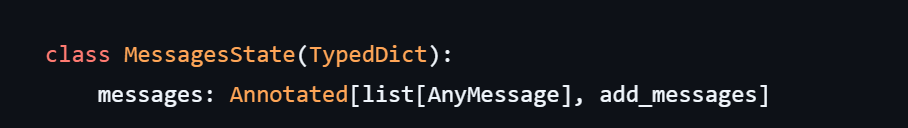

In [34]:
#class MessagesState(TypedDict):
#    messages: Annotated[list[AnyMessage], add_messages]

#### this state is a dict which containing the message as list and inside the list there could be n numbers of messages

#### this state will be flowing across all the nodes(function) in langgraph

In [23]:
def call_model(state:MessagesState):
    question=state["messages"]
    response=openai_model.invoke(question)
    return {"messages":[response]}

In [24]:
workflow=StateGraph(MessagesState)

In [25]:
workflow.add_node("chatbot",call_model)

In [26]:
workflow.add_edge(START,"chatbot")

In [27]:
workflow.add_edge("chatbot",END)

In [28]:
app=workflow.compile()

In [29]:
from IPython.display import Image,display

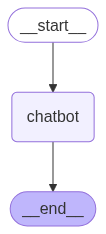

In [30]:
display(Image(app.get_graph().draw_mermaid_png()))

In [31]:
input={"messages":["hi my name is sunny"]}

In [32]:
response=app.invoke(input)

In [33]:
response["messages"][-1].content

'Hello, Sunny! How can I assist you today?'

In [35]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from chatbot Node
_______
{'messages': [AIMessage(content='Hello Sunny! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 12, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-Bz5APrJXeeA6XP7jAv3Qf4cWWRYNI', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--3db1a69f-6eed-4680-a8a7-8f48b8290555-0', usage_metadata={'input_tokens': 12, 'output_tokens': 10, 'total_tokens': 22, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}




## TOOLS:

In [36]:
@tool
def search(query:str):
    """this is a tool for weather checking"""
    if "india" in query.lower() or "delhi" in query.lower():
        return "the weather is hot with some foggy"
    return "weather is cloudy with some darkness"

In [37]:
search.invoke("what is a weather in japan?")

'weather is cloudy with some darkness'

In [38]:
search.invoke("what is a weather in delhi?")

'the weather is hot with some foggy'

In [39]:
tools=[search]

In [40]:
llm_with_tool = openai_model.bind_tools(tools)

In [41]:
response = llm_with_tool.invoke("hi")

In [42]:
response.content

'Hello! How can I assist you today?'

In [43]:
response.tool_calls

[]

In [44]:
result=llm_with_tool.invoke("what is a weather in europe?")

In [45]:
result.content

''

In [46]:
result.tool_calls

[{'name': 'search',
  'args': {'query': 'weather in Europe'},
  'id': 'call_SCjxD7QsoGozrT7faLNRzPTw',
  'type': 'tool_call'}]

In [47]:
def call_model(state:MessagesState):
    question=state["messages"]
    response=llm_with_tool.invoke(question)
    return {"messages":[response]}

In [48]:
input={'messages': ['hi my name is sunny']}

In [49]:
response = call_model(input)

In [50]:
message = response["messages"]

In [51]:
last_message = message[-1]

In [52]:
last_message.content

'Hello Sunny! How can I assist you today?'

In [53]:
last_message.tool_calls

[]

In [54]:
input={'messages': ['what is a weather in mumbai?']}

In [55]:
response = call_model(input)

In [56]:
message = response["messages"]
last_message = message[-1]
last_message.content

''

In [57]:
last_message.tool_calls

[{'name': 'search',
  'args': {'query': 'weather in Mumbai'},
  'id': 'call_GeG2faAlqxCK6pS1g0fjr8rl',
  'type': 'tool_call'}]

In [58]:
def router_function(state: MessagesState):
    message=state["messages"]
    last_message=message[-1]
    if last_message.tool_calls:
        return "tools"
    return END

In [59]:
tools

[StructuredTool(name='search', description='this is a tool for weather checking', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000002061ACF3380>)]

In [60]:
tool_node = ToolNode(tools)

In [61]:
workflow = StateGraph(MessagesState)

In [62]:
workflow.add_node("assistant",call_model)
workflow.add_node("myweathertool",tool_node)

In [63]:
workflow.add_edge(START, "assistant")

workflow.add_conditional_edges("assistant",
                               router_function,
                               {"tools": "myweathertool", END: END})

app = workflow.compile()

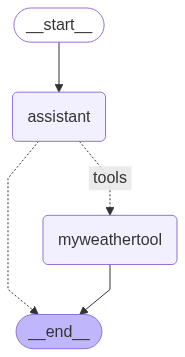

In [66]:
display(Image(app.get_graph().draw_mermaid_png()))

In [67]:
app.invoke({"messages": ["how are you?"]})

{'messages': [HumanMessage(content='how are you?', additional_kwargs={}, response_metadata={}, id='22cd6d7c-4792-4791-bf2f-678de73a9ed5'),
  AIMessage(content="I'm just a computer program, so I don't have feelings, but I'm here to help you! How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 48, 'total_tokens': 75, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a288987b44', 'id': 'chatcmpl-Bz5XoxZuIxUMACpP1QhiUvexdKVnd', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--acc43ef0-5995-47a9-ad37-7ede1353fa87-0', usage_metadata={'input_tokens': 48, 'output_tokens': 27, 'total_tokens': 75, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_tok

In [69]:
query1 = app.invoke({"messages": ["how are you?"]})
query1["messages"][-1].content

"I'm just a computer program, so I don't have feelings, but I'm here and ready to help you! How can I assist you today?"

In [68]:
app.invoke({"messages": ["what is a weather in delhi?"]})

{'messages': [HumanMessage(content='what is a weather in delhi?', additional_kwargs={}, response_metadata={}, id='5ecae48d-3674-499a-9fde-b6dfca8407dc'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_uPKGiCurut88yUvCDPnelgN0', 'function': {'arguments': '{"query":"Delhi weather"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 52, 'total_tokens': 66, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a288987b44', 'id': 'chatcmpl-Bz5Y7MP5831z3NGreKMUnFGRpWiiD', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--ee5d6714-45c8-4f5f-b6cc-517a505e7885-0', tool_calls=[{'name': 'search', 'args': {'query': 'Delhi weather'}, 'id': 'call

In [70]:
query2 = app.invoke({"messages": ["what is a weather in delhi?"]})
query2["messages"][-1].content

'the weather is hot with some foggy'

In [51]:
workflow.add_edge("myweathertool","assistant")

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [52]:
app = workflow.compile()

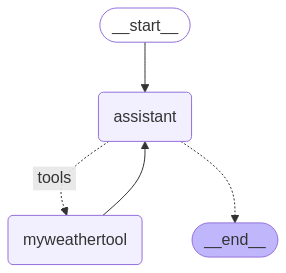

In [53]:
display(Image(app.get_graph().draw_mermaid_png()))

In [54]:
app.invoke({"messages": ["what is a weather in delhi?"]})

{'messages': [HumanMessage(content='what is a weather in delhi?', additional_kwargs={}, response_metadata={}, id='a61d43f6-a7ab-411e-b5f2-d3036f07ddf1'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_Pn87PZzbsUUYACk0VKthO2P3', 'function': {'arguments': '{"query":"weather in Delhi"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 52, 'total_tokens': 68, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_92f14e8683', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-a19fc966-7252-4855-9a4d-dba03fa17b96-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Delhi'}, 'id': 'call_Pn87PZzbsUUYACk0VKthO2P3', 'type': 'tool_call'}], usage_metadata={'in

In [55]:
for output in app.stream({"messages": ["what is the weather in delhi"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from assistant
_______
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_IJu4cbfI4ndMBtAfhktxkHnI', 'function': {'arguments': '{"query":"Delhi weather"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 51, 'total_tokens': 66, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_92f14e8683', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-fdd38279-e818-4183-a107-043832941dae-0', tool_calls=[{'name': 'search', 'args': {'query': 'Delhi weather'}, 'id': 'call_IJu4cbfI4ndMBtAfhktxkHnI', 'type': 'tool_call'}], usage_metadata={'input_tokens': 51, 'output_tokens': 15, 'total_tokens': 66, 'input_token_details': {'audio': 0, 'cache_read': 0}

In [ ]:
@tool
def multiply(a:int,b:int)->int:
    """multiply a and b"""
    return a*b

In [58]:
@tool
def add(a:int,b:int)->int:
    """adding two numbers a and b"""
    return a+b

In [59]:
@tool
def divide(a:int,b:int)->int:
    """dividing two numbers a and b"""
    return a/b

In [61]:
@tool
def subtract(a:int,b:int)->int:
    """subtracting two numbers a and b """
    return a-b

In [78]:
from langchain_community.tools import DuckDuckGoSearchRun


In [79]:
duckduckgo_search=DuckDuckGoSearchRun()

In [80]:
duckduckgo_search.invoke("who is a current prime minister of USA??")

"This is a list of current heads of state and heads of government. In some cases, ... Prime Minister - Keir Starmer United States: President - Donald Trump ... Prime Minister - Vacant: Sui generis entities. Entity Head of entity Head of government The White House, official residence of the president of the United States. The president of the United States is the head of state and head of government of the United States, [1] indirectly elected to a four-year term via the Electoral College. [2] Under the U.S. Constitution, the officeholder leads the executive branch of the federal government and is the commander-in-chief of the United ... The absence of a prime minister in the United States is a result of deliberate choices made by the country's Founding Fathers, who designed a political system that contrasts sharply with parliamentary systems. This article explores the reasons why the U.S. doesn't have a prime minister, focusing on the country's historical context, the ... Joe Biden (bo

In [81]:
tools=[multiply, add, divide, subtract, duckduckgo_search]

In [82]:
llm_with_tools=openai_model.bind_tools(tools)

In [83]:
llm_with_tools

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x000001A1C4897490>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000001A1C48C1DE0>, root_client=<openai.OpenAI object at 0x000001A1C47F8CD0>, root_async_client=<openai.AsyncOpenAI object at 0x000001A1C48974F0>, model_name='gpt-4o', model_kwargs={}, openai_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'multiply', 'description': 'multiply a and b', 'parameters': {'properties': {'a': {'type': 'integer'}, 'b': {'type': 'integer'}}, 'required': ['a', 'b'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'add', 'description': 'adding two numbers a and b', 'parameters': {'properties': {'a': {'type': 'integer'}, 'b': {'type': 'integer'}}, 'required': ['a', 'b'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'divide', 'description': 'dividing two numbers a and b', 

In [84]:
llm_with_tools.invoke("hi").tool_calls

[]

In [85]:
llm_with_tools.invoke("can you add these two number 5 and 40?").tool_calls

[{'name': 'add',
  'args': {'a': 5, 'b': 40},
  'id': 'call_0v1Qi6xpFx9xyOrU7lKTxdAJ',
  'type': 'tool_call'}]

In [86]:
llm_with_tools.invoke("can you multiply these two number 5 and 40?").tool_calls

[{'name': 'multiply',
  'args': {'a': 5, 'b': 40},
  'id': 'call_0t4cAMW9twoYZwnssQpdgUlm',
  'type': 'tool_call'}]

In [87]:
llm_with_tools.invoke("can you divide these two number 5 and 40?").tool_calls

[{'name': 'divide',
  'args': {'a': 5, 'b': 40},
  'id': 'call_ZB3IucS7KkgxpRpDie2HsXC8',
  'type': 'tool_call'}]

In [88]:
llm_with_tools.invoke("what is a current gdp of india with current affaires").tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'current GDP of India 2023'},
  'id': 'call_3kC1SSdjS3b84VTvw4Wy8dEs',
  'type': 'tool_call'}]

In [91]:
from langchain_core.messages import HumanMessage, SystemMessage

In [92]:
# System message
sys_msg = SystemMessage(content="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs.")
     

In [103]:
def assistant(state:MessagesState):
    return {"messages":[llm_with_tools.invoke([sys_msg]+state["messages"])]}

In [104]:
builder=StateGraph(MessagesState)

In [105]:
builder.add_node("assistant",assistant)

In [106]:
builder.add_node("tools",ToolNode(tools))

In [107]:
builder.add_edge(START,"assistant")

In [108]:

from langgraph.prebuilt import tools_condition

In [109]:
builder.add_conditional_edges(
    "assistant",
    tools_condition
)

In [110]:
react_app=builder.compile()

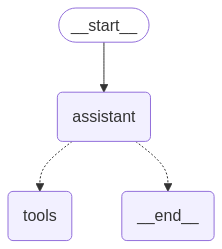

In [111]:
display(Image(react_app.get_graph().draw_mermaid_png()))

In [112]:
builder.add_edge("tools","assistant")

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [113]:
react_app=builder.compile()

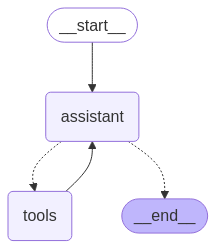

In [114]:
display(Image(react_app.get_graph().draw_mermaid_png()))

In [115]:
message=[HumanMessage(content="what is twice of narendra modi's current age?")]

## this below detail is called a agentic flow
# first it will come to assistant
# then it will search narendra modi age
# then it will come to again assistant
# then it wil call the multiply tool for getting twice of age
# then again it will come to assistant 
# then it will generate a final answer

# REACT->> Reasoning+actions

# Thinking, action, observation, thiniking,action, observation---> if everything is going to be full fill
# then generating a final ans

In [117]:
response=react_app.invoke({"messages":message})

In [118]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

what is twice of narendra modi's current age?
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (call_No6zjTboZqk3p2UwzO0Lfy5t)
 Call ID: call_No6zjTboZqk3p2UwzO0Lfy5t
  Args:
    query: Narendra Modi age 2023
================================= Tool Message =================================
Name: duckduckgo_search

Learn about the life and achievements of Narendra Modi, the current Prime Minister of India, who was born on September 17, 1950, in Gujarat. Find out his full name, education, political journey, and constituency. 2023: PM Narendra Modi announced the PM Vishwakarma Yojana to enhance the skilling of craftsmen and artisans in the country. Two key infrastructure projects - India International Convention and ... List of all Prime Ministers of India till 2025: Narendra Modi is the current and 14th Prime Minister of India who assumed office

In [119]:
messages=[HumanMessage(content="hi hello how are you?")]

In [120]:
response=react_app.invoke({"messages":messages})

In [121]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

hi hello how are you?
================================== Ai Message ==================================

Hello! I'm here to assist you. How can I help you today?


1. humanmessage
2. ai mesage:toolcall
3. duckcuk
4. ai assistant
5. sustract
6. ai
7. final answer

In [123]:
messages=[HumanMessage(content="what is current gdp of china and india can you give me difference between them?")]

In [124]:
response=react_app.invoke({"messages":messages})

In [125]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

what is current gdp of china and india can you give me difference between them?
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (call_0ONjcU39PBQslxPd6PCRbmjW)
 Call ID: call_0ONjcU39PBQslxPd6PCRbmjW
  Args:
    query: current GDP of China 2023
  duckduckgo_search (call_bBNSA8mOcuWhxnD9FtYq1bkp)
 Call ID: call_bBNSA8mOcuWhxnD9FtYq1bkp
  Args:
    query: current GDP of India 2023
================================= Tool Message =================================
Name: duckduckgo_search

China revised upwards on Thursday the size of its economy by 2.7%, but said the change would have little impact on growth this year, as policymakers pledged more stimulus to spur expansion in 2025. China's gross domestic product (GDP) in 2023 was revised to 129.4 trillion yuan ($17.73 trillion), up 3.37 trillion yuan, or 2.7 percent, from the preliminary figure, 

As of 2023, China's GDP is approximately $17.73 trillion, while India's GDP is about $3.9 trillion. The difference in their GDPs is approximately $13.83 trillion, with China's economy being larger than India's by this amount.

In [ ]:
project:rag,agent,deployment,modularcoding,ci/cd,git

multiagentic collrabtive agent and supoervisor agent



Reaserch and analsysis react agent: assisgnment
1. llm assistant
2. take a realtime weather api to check the real time weather detail
3. take a realtime api for checking realtime cricket score
4. take a tool for analysis the generated data(REPL)python code
5. create a report based on the generated data
memory
human in loop
multiagentic flow


from next week onwards will implemnt the project

## 1. langgraph-> memeory saver, human in loop
## 2. multiagents

In [11]:

from typing import Annotated
import operator,json
from typing import TypedDict, Annotated, Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph,END,START
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.tools import tool
from langchain_community.tools.tavily_search import TavilySearchResults

In [ ]:
import os
from langchain_community.tools.tavily_search import TavilySearchResults
TAVILY_API_KEY="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"
os.environ["TAVILY_API_KEY"]=TAVILY_API_KEY

In [13]:
import os
os.environ["TAVILY_API_KEY"]=TAVILY_API_KEY

In [16]:
@tool
def multiply(first_number:int, second_number:int)->int:
    """multiply two integer number"""
    return first_number * second_number

In [17]:
@tool
def search(query:str):
    """perform the web search on the user query"""
    tavily=TavilySearchResults(tavily_api_key="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")
    result=tavily.invoke(query)
    return result
     

In [18]:
search.invoke("who is a current PM in india?")

[{'title': 'Prime Minister of India - Wikipedia',
  'url': 'https://en.wikipedia.org/wiki/Prime_Minister_of_India',
  'content': "Rao, Atal Bihari Vajpayee, Manmohan Singh, and Narendra Modi. Modi is the current prime minister of India, serving since 26 May 2014. [...] Jump to content\nMain menu\nSearch\nDonate\nCreate account\nLog in\nPersonal tools\nToggle the table of contents\nPrime Minister of India\n53 languages\nArticle\nTalk\nRead\nView source\nView history\nTools\nFrom Wikipedia, the free encyclopedia\nFor a list of prime ministers, see List of prime ministers of India.\nPrime Minister of India\nBhārata kē Pradhānamaṁtrī\nLogo of The Prime Minister of India\nFlag of India\nIncumbent\nNarendra Modi\nsince\xa026 May 2014\nPrime Minister's Office\nUnion Council of Ministers [...] Narendra Modi was re-elected as prime minister in 2019 with a bigger mandate than that of 2014. The BJP-led NDA won 354 seats out of which BJP secured 303 seats.[76]\nParty affiliation\nSee also: List of

In [19]:
tools=[search,multiply]

In [20]:
model_with_tools=openai_model.bind_tools(tools)

In [21]:
model_with_tools.invoke("who is a cuurent pm of japan?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_xJZ823HEZpJELOkZNr8BAcZC', 'function': {'arguments': '{"query":"current Prime Minister of Japan 2023"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 78, 'total_tokens': 99, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_22890b9c0a', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-e310eb2b-45a0-456a-a2aa-6971dba11219-0', tool_calls=[{'name': 'search', 'args': {'query': 'current Prime Minister of Japan 2023'}, 'id': 'call_xJZ823HEZpJELOkZNr8BAcZC', 'type': 'tool_call'}], usage_metadata={'input_tokens': 78, 'output_tokens': 21, 'total_tokens': 99, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'out

In [22]:
model_with_tools.invoke("who is a cuurent pm of japan?").tool_calls

[{'name': 'search',
  'args': {'query': 'current Prime Minister of Japan'},
  'id': 'call_iMGTBCIRmIvdL5t3OyXfKUCr',
  'type': 'tool_call'}]

In [23]:
tool_mapping={tool.name: tool for tool in tools}

In [24]:
tool_mapping

{'search': StructuredTool(name='search', description='perform the web search on the user query', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000017563031990>),
 'multiply': StructuredTool(name='multiply', description='multiply two integer number', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x0000017560700B80>)}

In [167]:
response=model_with_tools.invoke("who is a current president of uk?")

In [168]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_tanGhlPkC5GFIsk5g68KSgMd', 'function': {'arguments': '{"query":"current president of UK 2023"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 77, 'total_tokens': 97, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_22890b9c0a', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-4582c853-1692-4cce-bb41-29d0140a7c6d-0', tool_calls=[{'name': 'search', 'args': {'query': 'current president of UK 2023'}, 'id': 'call_tanGhlPkC5GFIsk5g68KSgMd', 'type': 'tool_call'}], usage_metadata={'input_tokens': 77, 'output_tokens': 20, 'total_tokens': 97, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_detail

In [181]:
tool_details=response.additional_kwargs

In [182]:
tool_details

{'tool_calls': [{'id': 'call_tanGhlPkC5GFIsk5g68KSgMd',
   'function': {'arguments': '{"query":"current president of UK 2023"}',
    'name': 'search'},
   'type': 'function'}],
 'refusal': None}

In [174]:
tool_details=tool_details.get("tool_calls")

In [176]:
tool_details[0]["function"]["name"]

'search'

In [175]:
tool_details[0]["function"]["arguments"]

'{"query":"current president of UK 2023"}'

In [177]:
json.loads(tool_details[0]["function"]["arguments"])

{'query': 'current president of UK 2023'}

In [179]:
tool_mapping[tool_details[0]["function"]["name"]].invoke(json.loads(tool_details[0]["function"]["arguments"]))

[{'title': 'Rishi Sunak - Wikipedia',
  'url': 'https://en.wikipedia.org/wiki/Rishi_Sunak',
  'content': 'Sunak selected his cabinet ministers after his appointment as prime minister. Jeremy Hunt was appointed Chancellor of the Exchequer, and Dominic Raab was also re-appointed as deputy prime minister and Justice Secretary, he later resigned from these roles in April 2023 and was replaced by Oliver Dowden. James Cleverly was appointed Foreign Secretary with Suella Braverman as Home Secretary. Ben Wallace was appointed Secretary of State for Defence. Michael Gove was appointed Levelling Up [...] ^ Sparrow, Andrew (7 February 2023). "Rishi Sunak to hold limited cabinet shuffle – UK politics live". The Guardian.\n^ Sunak, Rishi (7 February 2023). Making Government Deliver for the British People (PDF). UK Government. Archived (PDF) from the original on 7 February 2023. Retrieved 7 February 2023. [...] Sunak was faced with the task of rebuilding the Conservatives\' reputation which had been

In [25]:
tool_mapping={tool.name: tool for tool in tools}

In [26]:
tool_mapping

{'search': StructuredTool(name='search', description='perform the web search on the user query', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000017563031990>),
 'multiply': StructuredTool(name='multiply', description='multiply two integer number', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x0000017560700B80>)}

In [18]:
class AgentState(TypedDict):
    messages:Annotated[Sequence[BaseMessage], operator.add]

In [28]:
def invoke_model(state:AgentState):
    messages = state['messages']
    question = messages[-1]   ## Fetching the user question
    return {"messages":[model_with_tools.invoke(question)]}

In [30]:
def invoke_tool(state:AgentState):
    print("****my state*****")
    print(state['messages'][-1])
    tool_details= state['messages'][-1].additional_kwargs.get("tool_calls", [])[0]
    
    if tool_details is None:
        raise Exception("no tool call found")
    
    print(f'Selected tool: {tool_details.get("function").get("name")}')
    
    if tool_details.get("function").get("name")=="search":
        print("**********tool detils****")
        print(tool_details)
        response = input(prompt=f"[y/n] continue with expensive web search?")
        if response == "n":
            raise Exception("web search discard")
        
    response = tool_mapping[tool_details['function']['name']].invoke(json.loads(tool_details.get("function").get("arguments")))
    return {"messages" : [response]}
     

In [32]:
def router(state:AgentState):
    tool_calls = state['messages'][-1].additional_kwargs.get("tool_calls", [])
    if len(tool_calls):
        return "tool"
    else:
        return "end"
     

In [54]:
graph=StateGraph(AgentState)

In [55]:
graph.add_node("ai_assistant",invoke_model)
graph.add_node("tool",invoke_tool)

In [56]:
graph.add_conditional_edges("ai_assistant",
                            router,
                            {"tool":"tool",
                             "end":END})

In [57]:
graph.add_edge("tool", END)

# graph.add_edge("tool", "ai_assistant")

graph.set_entry_point("ai_assistant")

In [58]:
app=graph.compile()

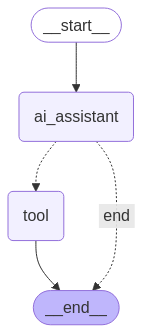

In [59]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [60]:
app.invoke({"messages": ["who is upcoming president of USA?"]})

****my state*****
content='' additional_kwargs={'tool_calls': [{'id': 'call_XQcn9xLA5dz6e2DLYE5qTSPY', 'function': {'arguments': '{"query":"upcoming president of USA 2023"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 76, 'total_tokens': 97, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_22890b9c0a', 'finish_reason': 'tool_calls', 'logprobs': None} id='run-ca64a716-63bf-4f0b-9aae-e52bd8033f66-0' tool_calls=[{'name': 'search', 'args': {'query': 'upcoming president of USA 2023'}, 'id': 'call_XQcn9xLA5dz6e2DLYE5qTSPY', 'type': 'tool_call'}] usage_metadata={'input_tokens': 76, 'output_tokens': 21, 'total_tokens': 97, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token

{'messages': ['who is upcoming president of USA?',
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_XQcn9xLA5dz6e2DLYE5qTSPY', 'function': {'arguments': '{"query":"upcoming president of USA 2023"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 76, 'total_tokens': 97, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_22890b9c0a', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-ca64a716-63bf-4f0b-9aae-e52bd8033f66-0', tool_calls=[{'name': 'search', 'args': {'query': 'upcoming president of USA 2023'}, 'id': 'call_XQcn9xLA5dz6e2DLYE5qTSPY', 'type': 'tool_call'}], usage_metadata={'input_tokens': 76, 'output_tokens': 21, 'total_tokens': 97, 'input_token_deta

In [61]:
for s in app.stream({"messages": ["who is upcoming president of USA?"]}):
    print(list(s.values())[0])
    print("----")

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_wbEnE8UR9OcJzhuj9ekb3WjE', 'function': {'arguments': '{"query":"upcoming president of USA 2023"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 76, 'total_tokens': 97, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_22890b9c0a', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-3f9b73d6-f8cf-4ce0-b2e7-a0565f76b1ea-0', tool_calls=[{'name': 'search', 'args': {'query': 'upcoming president of USA 2023'}, 'id': 'call_wbEnE8UR9OcJzhuj9ekb3WjE', 'type': 'tool_call'}], usage_metadata={'input_tokens': 76, 'output_tokens': 21, 'total_tokens': 97, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'o

In [62]:
app.invoke({"messages": ["what is multiplication of 23 and 46?"]})

****my state*****
content='' additional_kwargs={'tool_calls': [{'id': 'call_nR3ZuRvEX6nAdQul1NSm7pJH', 'function': {'arguments': '{"first_number":23,"second_number":46}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 79, 'total_tokens': 99, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_22890b9c0a', 'finish_reason': 'tool_calls', 'logprobs': None} id='run-4b20b0f0-5c68-4616-bb58-9b24e97fdaa9-0' tool_calls=[{'name': 'multiply', 'args': {'first_number': 23, 'second_number': 46}, 'id': 'call_nR3ZuRvEX6nAdQul1NSm7pJH', 'type': 'tool_call'}] usage_metadata={'input_tokens': 79, 'output_tokens': 20, 'total_tokens': 99, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_d

{'messages': ['what is multiplication of 23 and 46?',
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_nR3ZuRvEX6nAdQul1NSm7pJH', 'function': {'arguments': '{"first_number":23,"second_number":46}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 79, 'total_tokens': 99, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_22890b9c0a', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-4b20b0f0-5c68-4616-bb58-9b24e97fdaa9-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 23, 'second_number': 46}, 'id': 'call_nR3ZuRvEX6nAdQul1NSm7pJH', 'type': 'tool_call'}], usage_metadata={'input_tokens': 79, 'output_tokens': 20, 'total_tokens': 99, 'input_token_det

In [64]:
app.invoke({"messages": ["what is today's match score?"]})

****my state*****
content='' additional_kwargs={'tool_calls': [{'id': 'call_v3doO6lnvRtS3MM1B9v2viGT', 'function': {'arguments': '{"query":"today\'s match score"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 75, 'total_tokens': 92, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_22890b9c0a', 'finish_reason': 'tool_calls', 'logprobs': None} id='run-9ed12faa-1174-4f85-b9ef-e39c73836080-0' tool_calls=[{'name': 'search', 'args': {'query': "today's match score"}, 'id': 'call_v3doO6lnvRtS3MM1B9v2viGT', 'type': 'tool_call'}] usage_metadata={'input_tokens': 75, 'output_tokens': 17, 'total_tokens': 92, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 

{'messages': ["what is today's match score?",
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_v3doO6lnvRtS3MM1B9v2viGT', 'function': {'arguments': '{"query":"today\'s match score"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 75, 'total_tokens': 92, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_22890b9c0a', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-9ed12faa-1174-4f85-b9ef-e39c73836080-0', tool_calls=[{'name': 'search', 'args': {'query': "today's match score"}, 'id': 'call_v3doO6lnvRtS3MM1B9v2viGT', 'type': 'tool_call'}], usage_metadata={'input_tokens': 75, 'output_tokens': 17, 'total_tokens': 92, 'input_token_details': {'audio': 0, 'cache_

## Langgraph human in loop concept

In [67]:

tavily=TavilySearchResults()
     

In [68]:

tools = [tavily]

In [69]:
llm_with_tools=openai_model.bind_tools(tools)

In [70]:
def ai_assistant(state: AgentState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [88]:
memory=MemorySaver()

In [89]:
graph_builder = StateGraph(AgentState)
graph_builder.add_node("ai_assistant", ai_assistant)

tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

In [90]:
graph_builder.add_edge(START, "ai_assistant")

graph_builder.add_conditional_edges(
    "ai_assistant",
    tools_condition,
)
graph_builder.add_edge("tools", "ai_assistant")

In [91]:
app2=graph_builder.compile(
    checkpointer=memory,
    interrupt_before=["tools"]
)

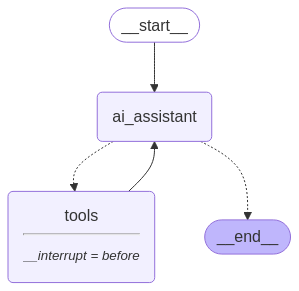

In [92]:
from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [77]:
user_input = "what is current a capital of india?"
config = {"configurable": {"thread_id": "1"}}

In [78]:
user_input = "what is today value of apple stock?"
config = {"configurable": {"thread_id": "1"}}

In [93]:
user_input = "famous places of the bangalore and must visit restaurants?"
config = {"configurable": {"thread_id": "1"}}

In [94]:
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [95]:
for event in events:
    print(event)

{'messages': [('user', 'famous places of the bangalore and must visit restaurants?')]}
{'messages': [('user', 'famous places of the bangalore and must visit restaurants?'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_NheTr6jPV4EZPe0g1Xluhdhy', 'function': {'arguments': '{"query": "famous places to visit in Bangalore"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}, {'id': 'call_UoOT3m5svSe0vMILWeIx6l75', 'function': {'arguments': '{"query": "must visit restaurants in Bangalore"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 63, 'prompt_tokens': 91, 'total_tokens': 154, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_92f14e8683', 'finish_reason

In [96]:
snapshot=app2.get_state(config)

In [97]:
snapshot.next

('tools',)

In [98]:

last_message=snapshot.values["messages"][-1]

In [99]:

last_message.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'famous places to visit in Bangalore'},
  'id': 'call_NheTr6jPV4EZPe0g1Xluhdhy',
  'type': 'tool_call'},
 {'name': 'tavily_search_results_json',
  'args': {'query': 'must visit restaurants in Bangalore'},
  'id': 'call_UoOT3m5svSe0vMILWeIx6l75',
  'type': 'tool_call'}]

In [100]:
events = app2.stream(None, config, stream_mode="values")

In [101]:

for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_NheTr6jPV4EZPe0g1Xluhdhy)
 Call ID: call_NheTr6jPV4EZPe0g1Xluhdhy
  Args:
    query: famous places to visit in Bangalore
  tavily_search_results_json (call_UoOT3m5svSe0vMILWeIx6l75)
 Call ID: call_UoOT3m5svSe0vMILWeIx6l75
  Args:
    query: must visit restaurants in Bangalore
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Best Restaurants In Bangalore To Delight Your Taste Buds In 2025!", "url": "https://traveltriangle.com/blog/best-restaurants-in-bangalore/", "content": "The king of cafes in Bangalore, Toit has set an unmatched standard amongst all the best restaurants in Bangalore. Freshly brewed beer, lively music, and a wide variety of international main courses and starters combine to give this place a ‘must-visit’ tag for any first-timer. It is one of the best restaurants in 

In [105]:

user_input = "what is a weather there?"

config = {"configurable": {"thread_id": "1"}}

In [106]:
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [108]:
for event in events:
    print(event)

{'messages': [['user', 'famous places of the bangalore and must visit restaurants?'], AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_NheTr6jPV4EZPe0g1Xluhdhy', 'function': {'arguments': '{"query": "famous places to visit in Bangalore"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}, {'id': 'call_UoOT3m5svSe0vMILWeIx6l75', 'function': {'arguments': '{"query": "must visit restaurants in Bangalore"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 63, 'prompt_tokens': 91, 'total_tokens': 154, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_92f14e8683', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-afa8bec0-9f5c-4783-94df-7beb2bb893d7-0', to

In [107]:

for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

AttributeError: 'tuple' object has no attribute 'pretty_print'

In [109]:

snapshot = app2.get_state(config)
     

In [110]:

snapshot.next

('tools',)

In [111]:

last_message=snapshot.values["messages"][-1]

In [112]:

last_message.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'Bangalore weather today'},
  'id': 'call_0NLdfZAg6hKgq0QpJ0GSNSYM',
  'type': 'tool_call'}]

In [113]:
events = app2.stream(None, config, stream_mode="values")

In [114]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_0NLdfZAg6hKgq0QpJ0GSNSYM)
 Call ID: call_0NLdfZAg6hKgq0QpJ0GSNSYM
  Args:
    query: Bangalore weather today
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "bengaluru Weather Forecast 13 Apr 2025 - Times of India", "url": "https://timesofindia.indiatimes.com/weather/bengaluru-weather-forecast-today/560001", "content": "Today's Weather in Bengaluru: In Bengaluru today, the weather is expected to be Partly Cloudy with a maximum temperature of 32°C and a minimum of 17°C.", "score": 0.96205425}, {"title": "Weather in Bangalore", "url": "https://www.weatherapi.com/", "content": "{'location': {'name': 'Bangalore', 'region': 'Karnataka', 'country': 'India', 'lat': 12.9833, 'lon': 77.5833, 'tz_id': 'Asia/Kolkata', 'localtime_epoch': 1744563279, 'localtime': '2025-04-13 22:24'}, 'current': {

In [116]:

app2.get_state(config)

StateSnapshot(values={'messages': [['user', 'famous places of the bangalore and must visit restaurants?'], AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_NheTr6jPV4EZPe0g1Xluhdhy', 'function': {'arguments': '{"query": "famous places to visit in Bangalore"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}, {'id': 'call_UoOT3m5svSe0vMILWeIx6l75', 'function': {'arguments': '{"query": "must visit restaurants in Bangalore"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 63, 'prompt_tokens': 91, 'total_tokens': 154, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_92f14e8683', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-afa8bec0-9f5c-4783-94d

In [117]:
snapshot=app2.get_state(config)

In [118]:

snapshot.next

()

In [119]:

user_input = "give me the recent news from there?"

config = {"configurable": {"thread_id": "1"}}

In [120]:
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [121]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

AttributeError: 'tuple' object has no attribute 'pretty_print'

In [122]:

snapshot=app2.get_state(config)
     

In [127]:

current_message = snapshot.values["messages"]
     

In [128]:
current_message

[['user', 'famous places of the bangalore and must visit restaurants?'],
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_NheTr6jPV4EZPe0g1Xluhdhy', 'function': {'arguments': '{"query": "famous places to visit in Bangalore"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}, {'id': 'call_UoOT3m5svSe0vMILWeIx6l75', 'function': {'arguments': '{"query": "must visit restaurants in Bangalore"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 63, 'prompt_tokens': 91, 'total_tokens': 154, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_92f14e8683', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-afa8bec0-9f5c-4783-94df-7beb2bb893d7-0', tool_calls=[{'

In [132]:
for event in events:
    if "messages" in event:
        last_message = event["messages"][-1]
        # Print the tuple elements (e.g., role and content)
        


In [124]:
current_message.pretty_print()

AttributeError: 'list' object has no attribute 'pretty_print'

In [126]:

tool_call_id = current_message.tool_calls[0]["id"] 

AttributeError: 'list' object has no attribute 'tool_calls'

In [129]:

from langchain_core.messages import AIMessage, ToolMessage

In [130]:
answer="delhi is too hot now a days as well as bit foggy"

In [131]:

new_messages = [
    ToolMessage(content=answer, tool_call_id=tool_call_id),
    AIMessage(content=answer),
]

NameError: name 'tool_call_id' is not defined

In [ ]:

app2.update_state(
    config,
    {"messages": new_messages},
)

In [ ]:

print(app2.get_state(config).values["messages"][-1:])